# Seawater Density Validation

This notebook validates the seawater density calculations in the SeaEcho water module by testing density as a function of:
1. **Salinity** (0-32 psu) at fixed temperature and pressure
2. **Temperature** (0-20°C) for freshwater at sea level  
3. **Depth** (0-3000 m) for seawater at fixed temperature

## Import Required Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to path to import SeaEcho modules
# For Jupyter notebooks, we need to use getcwd() instead of __file__
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from utils import SeaEcho_water as SeaEcho_water_bubble


## Test 1: Salinity Effects on Seawater Density


In [35]:
# Test salinity for fixed temperature and pressure
salinity = np.linspace(0, 32, 50)  # 0 to 32 psu
rho_salinity = np.zeros(len(salinity))

# Calculate density for each salinity value
for count, s in enumerate(salinity):
    water = SeaEcho_water_bubble.seawater(20, 0, s)  # 20°C, 0m depth, variable salinity
    rho_salinity[count] = water.rho

print(f"Salinity test completed:")
print(f"  Salinity range: {salinity[0]:.1f} - {salinity[-1]:.1f} psu")
print(f"  Density range: {np.min(rho_salinity):.2f} - {np.max(rho_salinity):.2f} kg/m³")
print(f"  Density increase per psu: {(np.max(rho_salinity) - np.min(rho_salinity))/32:.2f} kg/m³/psu")

Salinity test completed:
  Salinity range: 0.0 - 32.0 psu
  Density range: 998.25 - 1022.52 kg/m³
  Density increase per psu: 0.76 kg/m³/psu


## Test 2: Temperature Effects on Freshwater Density



In [36]:
# Test temperature for freshwater at sea level
T = np.linspace(0, 20, 50)  # 0 to 20°C
rho_temperature = np.zeros(len(T))

# Calculate density for each temperature value
for count, Ti in enumerate(T):
    water = SeaEcho_water_bubble.seawater(Ti, 0, 0)  # Variable temp, 0m depth, 0 salinity
    rho_temperature[count] = water.rho

print(f"Temperature test completed:")
print(f"  Temperature range: {T[0]:.1f} - {T[-1]:.1f} °C")
print(f"  Density range: {np.min(rho_temperature):.2f} - {np.max(rho_temperature):.2f} kg/m³")
print(f"  Density change per °C: {(np.max(rho_temperature) - np.min(rho_temperature))/20:.3f} kg/m³/°C")
print(f"  Note: Density decreases with increasing temperature (thermal expansion)")

Temperature test completed:
  Temperature range: 0.0 - 20.0 °C
  Density range: 998.25 - 1000.02 kg/m³
  Density change per °C: 0.089 kg/m³/°C
  Note: Density decreases with increasing temperature (thermal expansion)


## Test 3: Depth Effects on Seawater Density



In [37]:
# Test depth for seawater at a fixed temperature 
z = np.linspace(0, 3000, 50)  # 0 to 3000 m depth
rho_depth = np.zeros(len(z))

# Calculate density for each depth value
for count, zi in enumerate(z):
    water = SeaEcho_water_bubble.seawater(10, zi, 32)  # 10°C, variable depth, 32 psu
    rho_depth[count] = water.rho

print(f"Depth test completed:")
print(f"  Depth range: {z[0]:.0f} - {z[-1]:.0f} m")
print(f"  Density range: {np.min(rho_depth):.2f} - {np.max(rho_depth):.2f} kg/m³")
print(f"  Density increase per km: {(np.max(rho_depth) - np.min(rho_depth))/3:.2f} kg/m³/km")
print(f"  Pressure at 3000m: ~300 atmospheres (compressibility effect)")

Depth test completed:
  Depth range: 0 - 3000 m
  Density range: 1024.66 - 1038.04 kg/m³
  Density increase per km: 4.46 kg/m³/km
  Pressure at 3000m: ~300 atmospheres (compressibility effect)


## Create Combined Visualization



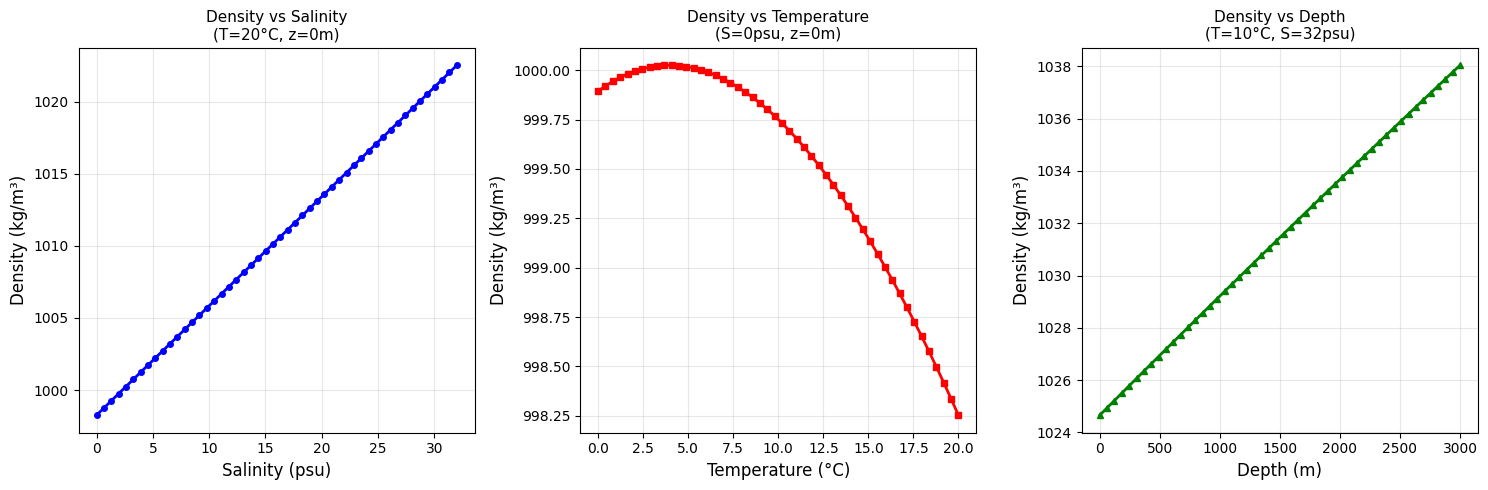

Three-panel density validation plot generated successfully!


In [38]:
# Create combined three-panel plot with simplified text rendering
import matplotlib
matplotlib.rcParams['mathtext.default'] = 'regular'  # Avoid mathtext issues

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Panel 1: Salinity effects
axs[0].plot(salinity, rho_salinity, 'b-', linewidth=2, marker='o', markersize=4)
axs[0].set_xlabel('Salinity (psu)', fontsize=12)
axs[0].set_ylabel('Density (kg/m³)', fontsize=12)  # Simplified ylabel
axs[0].set_title('Density vs Salinity\n(T=20°C, z=0m)', fontsize=11)
axs[0].grid(True, alpha=0.3)

# Panel 2: Temperature effects  
axs[1].plot(T, rho_temperature, 'r-', linewidth=2, marker='s', markersize=4)
axs[1].set_xlabel('Temperature (°C)', fontsize=12)
axs[1].set_ylabel('Density (kg/m³)', fontsize=12)  # Simplified ylabel
axs[1].set_title('Density vs Temperature\n(S=0psu, z=0m)', fontsize=11)
axs[1].grid(True, alpha=0.3)

# Panel 3: Depth effects
axs[2].plot(z, rho_depth, 'g-', linewidth=2, marker='^', markersize=4)
axs[2].set_xlabel('Depth (m)', fontsize=12)
axs[2].set_ylabel('Density (kg/m³)', fontsize=12)  # Simplified ylabel
axs[2].set_title('Density vs Depth\n(T=10°C, S=32psu)', fontsize=11)
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Three-panel density validation plot generated successfully!")

## Save and Display Results


Figure saved as '/Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/plots/seawater_density_validation.png'


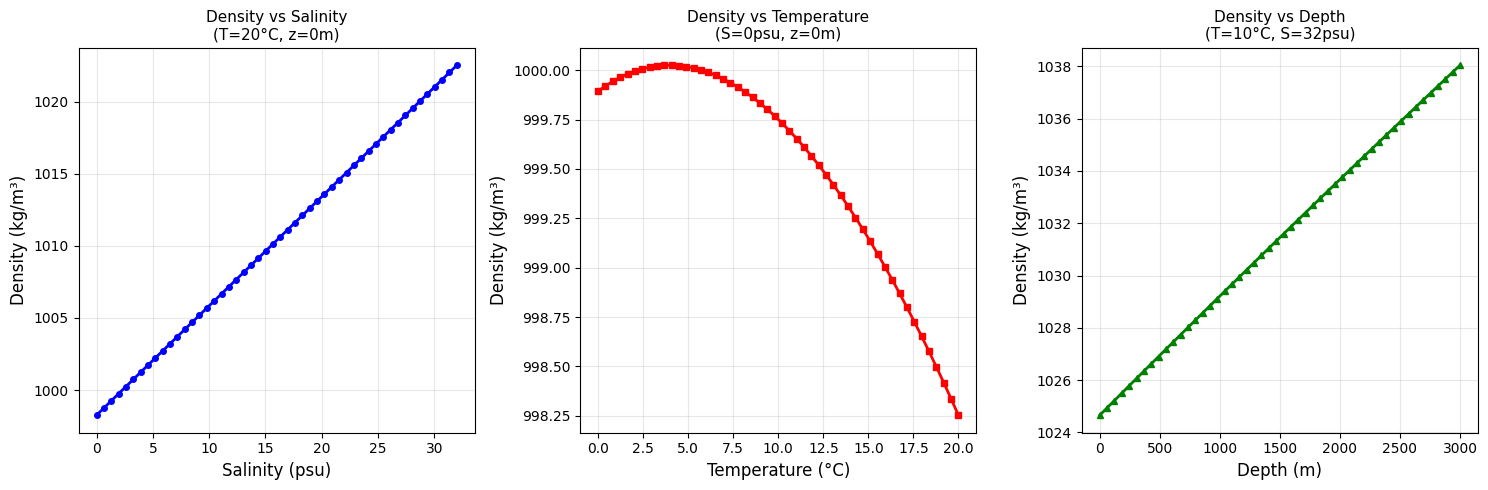

In [ ]:
# Save the plot as high-resolution PDF to main plots folder
from pathlib import Path

# Get project root and create path to main plots folder
PROJECT_ROOT = Path().resolve().parent  # Go up from validation to main project folder
plots_dir = PROJECT_ROOT / 'plots'
plots_dir.mkdir(exist_ok=True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Panel 1: Salinity effects
axs[0].plot(salinity, rho_salinity, 'b-', linewidth=2, marker='o', markersize=4)
axs[0].set_xlabel('Salinity (psu)', fontsize=12)
axs[0].set_ylabel('Density (kg/m³)', fontsize=12)
axs[0].set_title('Density vs Salinity\n(T=20°C, z=0m)', fontsize=11)
axs[0].grid(True, alpha=0.3)

# Panel 2: Temperature effects  
axs[1].plot(T, rho_temperature, 'r-', linewidth=2, marker='s', markersize=4)
axs[1].set_xlabel('Temperature (°C)', fontsize=12)
axs[1].set_ylabel('Density (kg/m³)', fontsize=12)
axs[1].set_title('Density vs Temperature\n(S=0psu, z=0m)', fontsize=11)
axs[1].grid(True, alpha=0.3)

# Panel 3: Depth effects
axs[2].plot(z, rho_depth, 'g-', linewidth=2, marker='^', markersize=4)
axs[2].set_xlabel('Depth (m)', fontsize=12)
axs[2].set_ylabel('Density (kg/m³)', fontsize=12)
axs[2].set_title('Density vs Depth\n(T=10°C, S=32psu)', fontsize=11)
axs[2].grid(True, alpha=0.3)

plt.tight_layout()

# Save to main plots folder
plot_path = plots_dir / 'seawater_density_validation.pdf'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as '{plot_path}'")
plt.show()